<a href="https://colab.research.google.com/github/Koushik-SCC/Physics/blob/main/Laplace's_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First Question
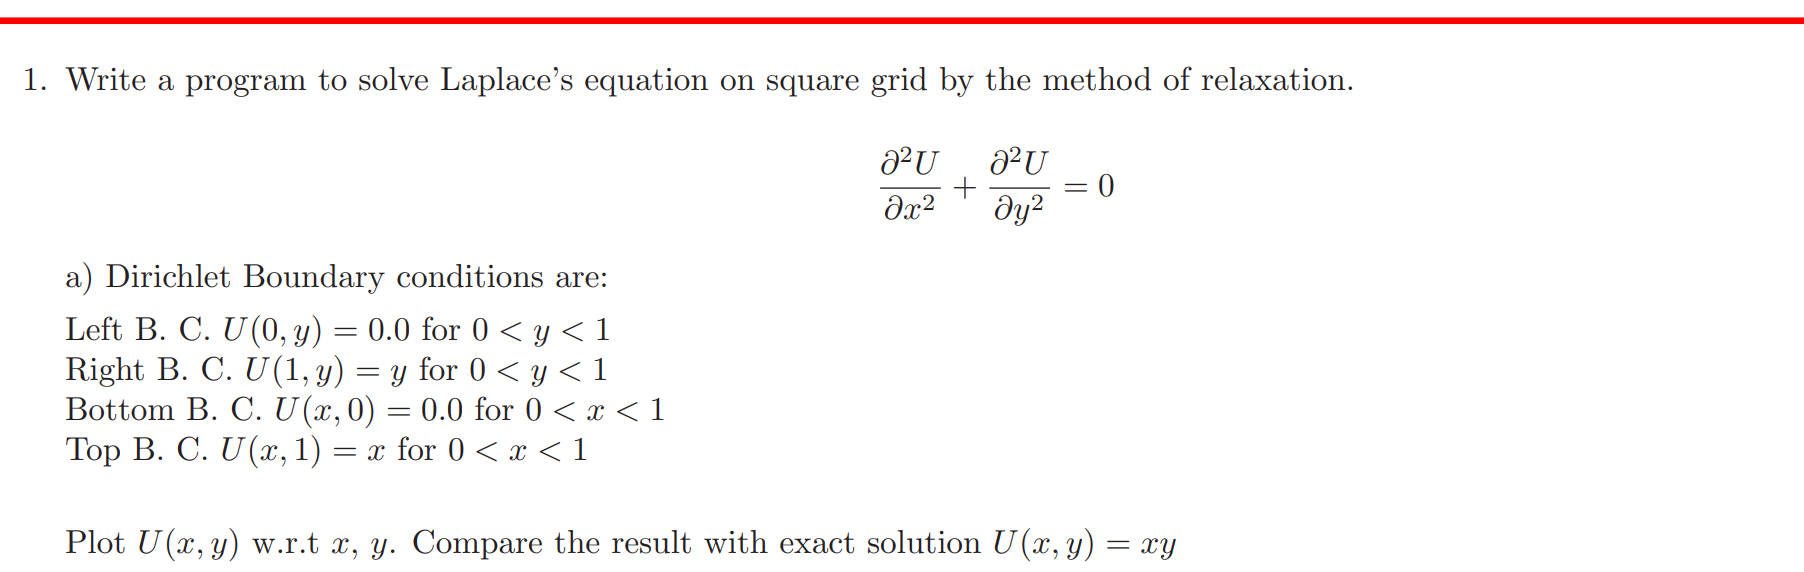

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# $ \color{red}{\text{Using while loop}} $

Enter the step: 0.2
Exact: 
 [[0.   0.   0.   0.   0.   0.  ]
 [0.   0.04 0.08 0.12 0.16 0.2 ]
 [0.   0.08 0.16 0.24 0.32 0.4 ]
 [0.   0.12 0.24 0.36 0.48 0.6 ]
 [0.   0.16 0.32 0.48 0.64 0.8 ]
 [0.   0.2  0.4  0.6  0.8  1.  ]]
Calculated:
 [[0.         0.         0.         0.         0.         0.        ]
 [0.         0.03403707 0.0721586  0.11363787 0.15681484 0.2       ]
 [0.         0.0721586  0.14970898 0.23166115 0.31582802 0.4       ]
 [0.         0.11363787 0.23166115 0.35324861 0.47662367 0.6       ]
 [0.         0.15681484 0.31582802 0.47662367 0.63831183 0.8       ]
 [0.         0.2        0.4        0.6        0.8        1.        ]]


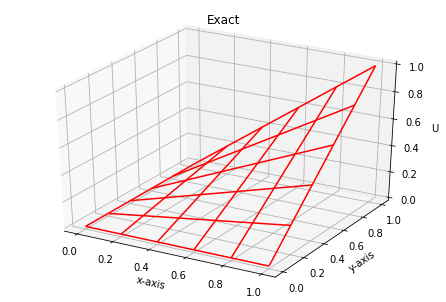

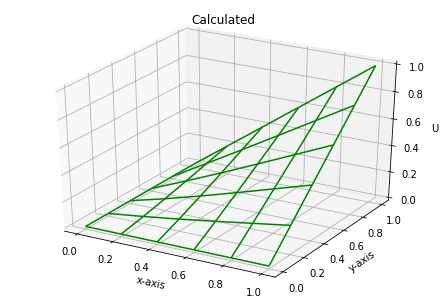

In [7]:
Lx,Ly= 1, 1
h = eval(input('Enter the step: '))
Nx, Ny = int(Lx/h), int(Ly/h)
U = np.zeros((Nx+1,Ny+1),float)
U_temp = U.copy()

x, y = np.linspace(0,1,Nx+1), np.linspace(0,1,Ny+1)
U[:,0] = 0.0      #LBC
U[:,-1] = y       #RBC # y[::-1] reverses the y array
U[-1,:] = 0.0     #BBC
U[0,:] = x        #TBC
X,Y = np.meshgrid(x,y)
# Changing the BBC and TBC according to how python plots
U[-1,:] = x       #BBC
U[0,:] = 0.0      #TBC
#print(U)
#print(U_temp)
u = X*Y  # exact result

err = 100
while err > .001:
    for i in range(1,Nx):
        for j in range(1,Ny):
            U[i,j] = (U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1])/4
            err = np.sum(np.abs(U[i,j] - U_temp[i,j]))
    U_temp = U.copy()
print('Exact: \n',u)
print('Calculated:\n',U)
fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_wireframe(X,Y,u,color='r')
ax1.set_title("Exact")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
ax1.set_zlabel("U")
plt.show()
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_wireframe(X,Y,U,color='g')
ax2.set_title("Calculated")
ax2.set_xlabel("x-axis")
ax2.set_ylabel("y-axis")
ax2.set_zlabel("U")
plt.show()

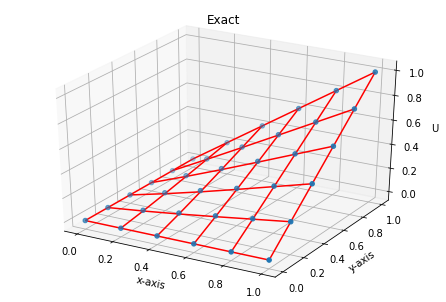

In [8]:
# scatter u on U graph
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X,Y,U,color='red')
ax.scatter3D(X,Y,u)
ax.set_title("Exact")
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("U")
plt.show()

Locator attempting to generate 1001 ticks ([0.0, ..., 1.0]), which exceeds Locator.MAXTICKS (1000).


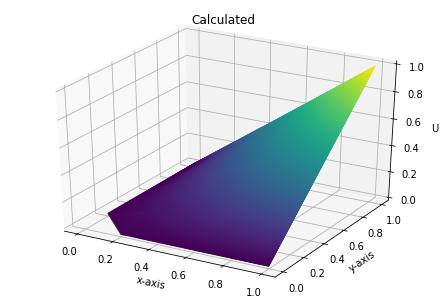

In [9]:
# Contour Plot
fig3 = plt.figure()
ax3 = Axes3D(fig3)
ax3.contour3D(X,Y,U,1000)
ax3.set_title("Calculated")
ax3.set_xlabel("x-axis")
ax3.set_ylabel("y-axis")
ax3.set_zlabel("U")
plt.show()

### Calculating the difference in a matrix

## $ \color{red}{\text{Using for loop}} $

Enter the step: 0.1
Max Difference: 0.5777778625488281
Max Difference: 0.21111192703247067
Max Difference: 0.15144348144531247
Max Difference: 0.08889982104301453
Max Difference: 0.06476909220218657
Max Difference: 0.053548083640635014
Max Difference: 0.042628536047413956
Max Difference: 0.033951622014865346
Max Difference: 0.028020416210074506
Max Difference: 0.02413061600909716
Max Difference: 0.021188620257999002
Max Difference: 0.018533277960091243
Max Difference: 0.016206180584251967
Max Difference: 0.014193126773732384
Max Difference: 0.012460205021865983
Max Difference: 0.011051917193866723
Max Difference: 0.009949312570177782
Max Difference: 0.00903678783160633
Max Difference: 0.008196095854440755
Max Difference: 0.007426612254923748
Max Difference: 0.006725234677630726
Max Difference: 0.006087650637524228
Max Difference: 0.005509066259383022
Max Difference: 0.004984616178774104
Max Difference: 0.0045095861369597035
Max Difference: 0.0040795263974946205
Max Difference: 0.003690

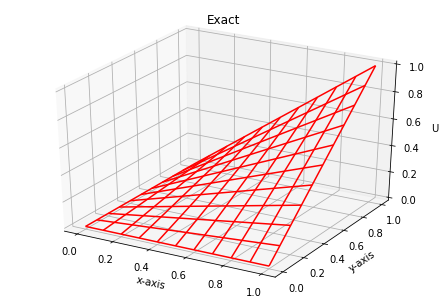

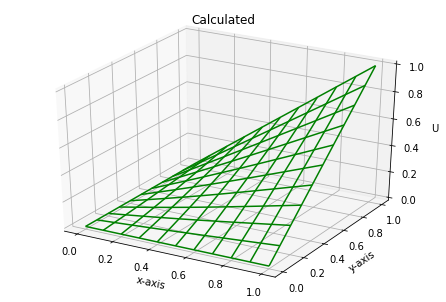

In [10]:
Lx,Ly= 1, 1
h = eval(input('Enter the step: '))
Nx, Ny = int(Lx/h), int(Ly/h)
U = np.zeros((Nx+1,Ny+1),float)
U_temp = U.copy()
diff = np.zeros((Nx,Ny),float)

x, y = np.linspace(0,1,Nx+1), np.linspace(0,1,Ny+1)
U[:,0] = 0.0      #LBC
U[:,-1] = y #RBC # y[::-1] reverses the y array
U[-1,:] = 0.0     #BBC
U[0,:] = x        #TBC
X,Y = np.meshgrid(x,y)
# Changing the BBC and TBC according to how python plots
U[-1,:] = x     #BBC
U[0,:] = 0.0        #TBC
#print(U)
#print(U_temp)
u = X*Y  # exact result
for k in range(100):
	U_temp = U.copy()
	for j in range(1,Ny):
		for i in range(1,Nx):
			U[i,j] = (U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1])/4.0
	diff = np.abs(U - U_temp)
	print('Max Difference:', np.max(diff))
	if np.max(diff) < 0.001:
		print('Number of iteration:',k)
		break
print('Exact: \n',u)
print('Calculated:\n',U)
fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_wireframe(X,Y,u,color='r')
ax1.set_title("Exact")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
ax1.set_zlabel("U")
plt.show()
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_wireframe(X,Y,U,color='g')
ax2.set_title("Calculated")
ax2.set_xlabel("x-axis")
ax2.set_ylabel("y-axis")
ax2.set_zlabel("U")
plt.show()

## Second Question
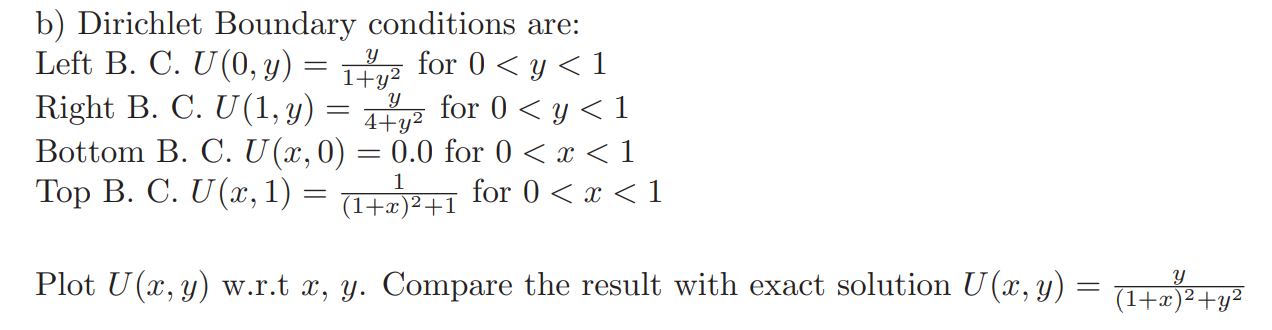

Enter the step: 0.1
Exact: 
 [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.0990099  0.08196721 0.06896552 0.05882353 0.05076142 0.04424779
  0.03891051 0.03448276 0.03076923 0.02762431 0.02493766]
 [0.19230769 0.16       0.13513514 0.11560694 0.1        0.08733624
  0.07692308 0.06825939 0.06097561 0.05479452 0.04950495]
 [0.27522936 0.23076923 0.19607843 0.16853933 0.14634146 0.12820513
  0.11320755 0.10067114 0.09009009 0.08108108 0.07334963]
 [0.34482759 0.2919708  0.25       0.21621622 0.18867925 0.1659751
  0.14705882 0.13114754 0.11764706 0.1061008  0.09615385]
 [0.4        0.34246575 0.29585799 0.25773196 0.22624434 0.2
  0.17793594 0.15923567 0.14326648 0.12953368 0.11764706]
 [0.44117647 0.38216561 0.33333333 0.29268293 0.25862069 0.22988506
  0.20547945 0.18461538 0.16666667 0.1511335  0.13761468]
 [0.46979866 0.41176471 0.3626943  0.32110092 0.28571429 0.25547445
  0.2295082  0.20710059 0.18766756 0.

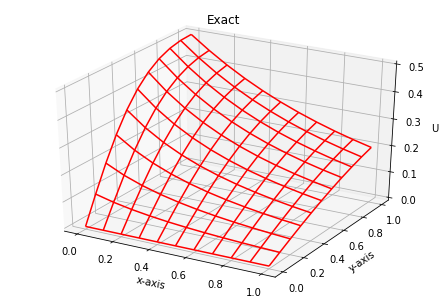

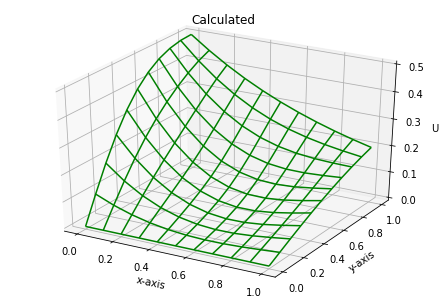

In [11]:
Lx,Ly= 1, 1
h = eval(input('Enter the step: '))
Nx, Ny = int(Lx/h), int(Ly/h)
U = np.zeros((Nx+1,Ny+1),float)
U_temp = U.copy()
diff = np.zeros((Nx,Ny),float)

x, y = np.linspace(0,Lx,Nx+1), np.linspace(0,Ly,Ny+1)
U[:,0] = y/(1+y**2)     #LBC
U[:,-1] = y/(4+y**2)    #RBC
U[-1,:] = 0             #BBC
U[0,:] = 1/((1+x)**2+1) #TBC
X,Y = np.meshgrid(x,y)
# Changing the BBC and TBC according to how python plots
U[-1,:] = 1/((1+x)**2+1)#BBC
U[0,:] = 0.0            #TBC
u = Y/((1+X)**2+Y**2)

err = 100
while err > .001:
    for i in range(1,Nx):
        for j in range(1,Ny):
            U[i,j] = (U[i+1,j]+U[i-1,j]+U[i,j+1]+U[i,j-1])/4
            err = np.sum(np.abs(U[i,j] - U_temp[i,j]))
    U_temp = U.copy()
print('Exact: \n',u)
print('Calculated:\n',U)
fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_wireframe(X,Y,u,color='r')
ax1.set_title("Exact")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
ax1.set_zlabel("U")
plt.show()
fig2 = plt.figure()
ax2 = Axes3D(fig2)
ax2.plot_wireframe(X,Y,U,color='g')
ax2.set_title("Calculated")
ax2.set_xlabel("x-axis")
ax2.set_ylabel("y-axis")
ax2.set_zlabel("U")
plt.show()

Locator attempting to generate 1001 ticks ([0.0, ..., 0.5]), which exceeds Locator.MAXTICKS (1000).


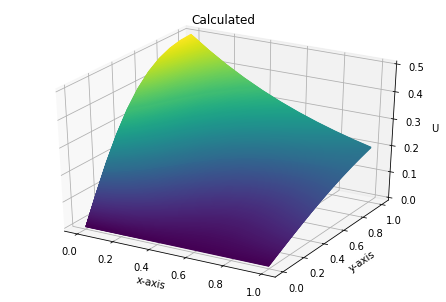

In [12]:
# Contour Plot
fig3 = plt.figure()
ax3 = Axes3D(fig3)
ax3.contour3D(X,Y,U,1000)
ax3.set_title("Calculated")
ax3.set_xlabel("x-axis")
ax3.set_ylabel("y-axis")
ax3.set_zlabel("U")
plt.show()